<a href="https://colab.research.google.com/github/Rohit233/Knn_Classifier_On_Dataset/blob/main/Knn_Classifier_Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [162]:
dataset = pd.read_csv('atomradii.csv')
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 3].values

In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [165]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [166]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [167]:
y_test

array(['PT', 'TM', 'Alk'], dtype=object)

In [168]:
y_pred

array(['PT', 'Alk', 'Alk'], dtype=object)

In [169]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)*100
cm

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [170]:
print("Accuracy:"+str(ac)+' %')

Accuracy:66.66666666666666 %


Text(0, 0.5, 'Error Rate')

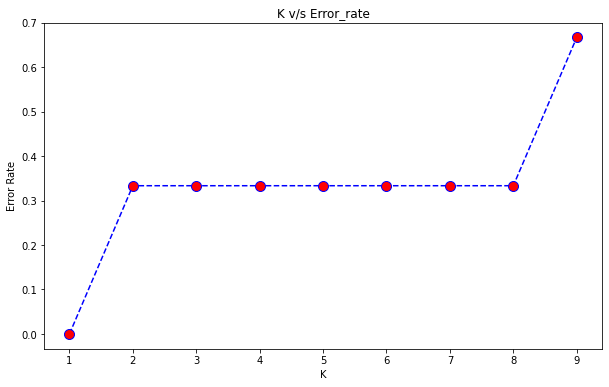

In [171]:
error_rate = []

for i in range (1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10, 6))
plt.plot(range(1, 10) , error_rate, color = 'blue' , linestyle = '--', markersize = 10, markerfacecolor = 'red' , marker = 'o' )
plt.plot()
plt.title('K v/s Error_rate')

plt.xlabel('K')
plt.ylabel('Error Rate')